In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)  
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline 
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_fulfil_center=pd.read_csv(r'C:/Users/matebook x/Desktop/MTN/Food Demand Forecasting/fulfilment_center_info.csv')
df_meal=pd.read_csv(r'C:/Users/matebook x/Desktop/MTN/Food Demand Forecasting/meal_info.csv')
df_sample=pd.read_csv(r'C:/Users/matebook x/Desktop/MTN/Food Demand Forecasting/sample_submission.csv')
df_test=pd.read_csv(r'C:/Users/matebook x/Desktop/MTN/Food Demand Forecasting/test.csv')
df_train=pd.read_csv(r'C:/Users/matebook x/Desktop/MTN/Food Demand Forecasting/train.csv')

In [3]:
print("The Shape of Demand dataset :",df_train.shape)
print("The Shape of Fulmilment Center Information dataset :",df_fulfil_center.shape)
print("The Shape of Meal information dataset :",df_meal.shape)
print("The Shape of Test dataset :",df_test.shape)
print("The Shape of Sample dataset :",df_sample.shape)

The Shape of Demand dataset : (456548, 9)
The Shape of Fulmilment Center Information dataset : (77, 5)
The Shape of Meal information dataset : (51, 3)
The Shape of Test dataset : (32573, 8)
The Shape of Sample dataset : (32573, 2)


## Analysing Fullfillment center Information

In [4]:
df_fulfil_center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


Columns in Fullfillment Center dataset

In [5]:
df_fulfil_center.columns

Index(['center_id', 'city_code', 'region_code', 'center_type', 'op_area'], dtype='object')

Summary of Fullfillment Center dataset

df_fulfil_center.info()

In [6]:
df_fulfil_center.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


Analysing City_code,region_code and centre_type column

In [7]:
df_fulfil_center.city_code.value_counts()

590    9
526    8
638    3
647    2
614    2
676    2
604    2
522    2
576    2
699    2
593    2
517    2
651    1
456    1
695    1
602    1
700    1
703    1
679    1
485    1
685    1
577    1
461    1
702    1
615    1
599    1
579    1
609    1
658    1
683    1
675    1
541    1
659    1
648    1
632    1
553    1
693    1
562    1
478    1
713    1
654    1
515    1
698    1
628    1
680    1
620    1
649    1
596    1
473    1
556    1
561    1
Name: city_code, dtype: int64

In [8]:
df_fulfil_center.region_code.value_counts()

56    30
34    21
77    17
85     5
23     1
71     1
35     1
93     1
Name: region_code, dtype: int64

In [9]:
df_fulfil_center.center_type.value_counts()

TYPE_A    43
TYPE_C    19
TYPE_B    15
Name: center_type, dtype: int64

Checking the values in Operating area column

In [10]:
df_fulfil_center.op_area.describe()

count    77.000000
mean      3.985714
std       1.106406
min       0.900000
25%       3.500000
50%       3.900000
75%       4.400000
max       7.000000
Name: op_area, dtype: float64

checking null values if any

In [11]:
df_fulfil_center.isnull().sum()

center_id      0
city_code      0
region_code    0
center_type    0
op_area        0
dtype: int64

Fulfilment Center Information is cleaned and no further data cleaning is required.

## Analysing Meal Information

In [12]:
df_meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


Meal Information Summary

In [13]:
df_meal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


Analysing the values in category and cuisine column

In [14]:
df_meal.category.value_counts()

Beverages       12
Extras           3
Soup             3
Other Snacks     3
Salad            3
Rice Bowl        3
Starters         3
Sandwich         3
Pasta            3
Desert           3
Biryani          3
Pizza            3
Fish             3
Seafood          3
Name: category, dtype: int64

In [15]:
df_meal.cuisine.value_counts()

Thai           15
Indian         12
Italian        12
Continental    12
Name: cuisine, dtype: int64

checking null values if any

In [16]:
df_meal.isnull().sum()

meal_id     0
category    0
cuisine     0
dtype: int64

Meal Information is cleaned and no further data cleaning is required.

In [17]:
df_sample.head()

,id,num_orders
0,1028232,0
1,1127204,0
2,1212707,0
3,1082698,0
4,1400926,0


## Analysing Training Data

In [18]:
df_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


Summary of Training data

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


Checking null values if any

In [20]:
df_train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

Checking the week column

In [21]:
df_train.week.value_counts()

122    3359
105    3348
106    3347
140    3332
123    3331
       ... 
13     2838
12     2831
14     2830
7      2795
8      2786
Name: week, Length: 145, dtype: int64

Training data have unequal observations for weeks. That means, data has missing observations for many weeks.

checking center_id column

In [22]:
df_train.center_id.value_counts()

13     7046
10     7015
52     6993
43     6970
67     6915
       ... 
139    4627
57     4501
162    4366
41     4083
91     3432
Name: center_id, Length: 77, dtype: int64

checking meal_id column

In [23]:
df_train.meal_id.value_counts()

2290    11138
1062    11137
1727    11136
1109    11134
1754    11132
2707    11123
1778    11121
1993    11116
1962    11114
1971    11102
1885    11092
2581    11072
2826    11057
2322    11002
1558    10952
1207    10806
2640    10747
1230    10746
1878    10527
2631    10458
2539    10451
1543    10236
2760    10209
1248     9939
2664     9853
2704     9811
1445     9727
2126     9705
1216     9695
2304     9676
2569     9459
2492     9382
1525     9359
2490     9247
2444     9097
2139     8899
2577     8667
2306     8294
2867     8092
1247     7184
1902     6748
1770     6682
1311     4682
1803     4674
1571     4511
1438     4385
1198     4206
2494     4206
1847     4084
2956     3319
2104     2357
Name: meal_id, dtype: int64

checking values in check_out price

In [24]:
df_train.checkout_price.describe()

count    456548.000000
mean        332.238933
std         152.939723
min           2.970000
25%         228.950000
50%         296.820000
75%         445.230000
max         866.270000
Name: checkout_price, dtype: float64

checking values in base_price column

In [25]:
df_train.base_price.describe()

count    456548.000000
mean        354.156627
std         160.715914
min          55.350000
25%         243.500000
50%         310.460000
75%         458.870000
max         866.270000
Name: base_price, dtype: float64

There is a huge gap in minimum and 25% value for base_price.

In [26]:
df_train.sort_values('checkout_price').head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
110286,1300283,38,73,1230,2.97,316.25,0,0,14
44875,1381921,16,41,1248,45.62,253.23,0,0,123
44874,1414392,16,41,2631,47.59,253.23,0,0,163
417180,1372230,134,24,2631,53.41,86.39,1,0,134
72701,1324508,26,124,1803,55.35,212.43,0,0,81


In the first column,the base price is 316.25 and check out price is 2.97,which means 2.97 is outlier.

checking values in num_orders

In [27]:
df_train.num_orders.describe()

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

There is a difference in maximum value and 75% value.Seems there is outlier.

In [28]:
df_train.sort_values('num_orders').tail()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
413351,1346216,132,43,1971,204.70,324.04,1,1,13150
13923,1470267,5,10,2290,162.99,309.43,1,0,13580
16904,1087163,6,43,2290,156.20,310.43,0,1,14229
19700,1300512,7,43,2290,159.08,311.43,1,1,15336
14050,1452474,5,43,2290,159.08,311.43,1,1,24299


The last column seems to be an outlier

checking emailer_for_promotion column

In [29]:
df_train.emailer_for_promotion.value_counts()

0    419498
1     37050
Name: emailer_for_promotion, dtype: int64

checking homepage_featured column

In [30]:
df_train.homepage_featured.value_counts()

0    406693
1     49855
Name: homepage_featured, dtype: int64

## Observations from Training data

1. The training data is missing for some weeks.
2. There is an outlier with checkout_price as 2.97.
3. Another outlier is present in number of orders as 24299.

## Analysing test data

In [31]:
df_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


Summary of Test data 

In [32]:

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [33]:
df_test.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
dtype: int64

There are no missing values in test data

checking week column

In [34]:
df_test.week.value_counts()

148    3332
149    3313
150    3277
147    3271
153    3268
152    3242
146    3240
154    3228
151    3224
155    3178
Name: week, dtype: int64

Test Data also have missing observation for some weeks.

checking center_id

In [35]:
df_test.center_id.value_counts()

13     509
10     508
52     506
174    504
67     499
      ... 
139    321
57     311
162    310
41     299
91     280
Name: center_id, Length: 77, dtype: int64

checking meal_id

In [36]:
df_test.meal_id.value_counts()

2290    770
2569    770
2664    770
1962    770
1754    770
2826    770
1727    770
1885    769
2490    769
2581    769
1109    769
1971    768
1558    767
1993    767
1062    766
2707    764
1778    762
2539    761
1543    760
1207    758
2322    752
1230    744
2640    735
2704    724
2631    717
2304    715
2760    712
1216    709
1878    709
2139    671
1525    668
1248    660
2492    638
2126    626
1445    602
2306    592
2444    568
1571    544
2577    540
2867    527
1770    486
1902    435
2956    426
1247    416
2104    361
1311    342
1803    341
1847    333
1438    327
1198    309
2494    305
Name: meal_id, dtype: int64

checking checkout_price

In [37]:
df_test.checkout_price.describe()

count    32573.000000
mean       341.854440
std        153.893886
min         67.900000
25%        214.430000
50%        320.130000
75%        446.230000
max       1113.620000
Name: checkout_price, dtype: float64

checking base_price

In [38]:
df_test.base_price.describe()

count    32573.000000
mean       356.493615
std        155.150101
min         89.240000
25%        243.500000
50%        321.130000
75%        455.930000
max       1112.620000
Name: base_price, dtype: float64

checking emailer_for_promotion

In [39]:
df_test.emailer_for_promotion.value_counts()

0    30409
1     2164
Name: emailer_for_promotion, dtype: int64

checking homepage_featured

In [40]:
df_test.homepage_featured.value_counts()

0    29923
1     2650
Name: homepage_featured, dtype: int64

## Observations from Training data

1. The test data also has missing observation for some weeks.

## Data Preprocessing

Combining test and train data

In [41]:
training_data_without_target = df_train[df_train.columns[df_train.columns != 'num_orders'].values]
total_data = training_data_without_target.append(df_test, sort=False)
total_data.tail()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
32568,1250239,155,61,1543,482.09,484.09,0,0
32569,1039516,155,61,2304,483.09,483.09,0,0
32570,1158107,155,61,2664,322.07,323.07,0,0
32571,1444235,155,61,2569,322.07,323.07,0,0
32572,1291286,155,61,2490,276.45,276.45,0,0


merging fulfilment center information to total data

In [42]:
total_data=total_data.merge(df_fulfil_center,on='center_id',how='left')
total_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,647,56,TYPE_C,2.0


merging meal information to total data

In [109]:
total_data = total_data.merge(df_meal, on='meal_id', how='left')
total_data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category_x,cuisine_x,year,month,quarter,week_in_month,category_y,cuisine_y,category_x,cuisine_x,category_y,cuisine_y,category_x,cuisine_x,category_y,cuisine_y,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,647,56,TYPE_C,2.0,Beverages,Thai,1,1,1,1,Beverages,Thai,Beverages,Thai,Beverages,Thai,Beverages,Thai,Beverages,Thai,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,647,56,TYPE_C,2.0,Beverages,Thai,1,1,1,1,Beverages,Thai,Beverages,Thai,Beverages,Thai,Beverages,Thai,Beverages,Thai,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,647,56,TYPE_C,2.0,Beverages,Thai,1,1,1,1,Beverages,Thai,Beverages,Thai,Beverages,Thai,Beverages,Thai,Beverages,Thai,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,647,56,TYPE_C,2.0,Beverages,Indian,1,1,1,1,Beverages,Indian,Beverages,Indian,Beverages,Indian,Beverages,Indian,Beverages,Indian,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,647,56,TYPE_C,2.0,Beverages,Indian,1,1,1,1,Beverages,Indian,Beverages,Indian,Beverages,Indian,Beverages,Indian,Beverages,Indian,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489116,1250239,155,61,1543,482.09,484.09,0,0,473,77,TYPE_A,4.5,Desert,Indian,3,13,4,3,Desert,Indian,Desert,Indian,Desert,Indian,Desert,Indian,Desert,Indian,Desert,Indian
489117,1039516,155,61,2304,483.09,483.09,0,0,473,77,TYPE_A,4.5,Desert,Indian,3,13,4,3,Desert,Indian,Desert,Indian,Desert,Indian,Desert,Indian,Desert,Indian,Desert,Indian
489118,1158107,155,61,2664,322.07,323.07,0,0,473,77,TYPE_A,4.5,Salad,Italian,3,13,4,3,Salad,Italian,Salad,Italian,Salad,Italian,Salad,Italian,Salad,Italian,Salad,Italian
489119,1444235,155,61,2569,322.07,323.07,0,0,473,77,TYPE_A,4.5,Salad,Italian,3,13,4,3,Salad,Italian,Salad,Italian,Salad,Italian,Salad,Italian,Salad,Italian,Salad,Italian


In [44]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489121 entries, 0 to 489120
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     489121 non-null  int64  
 1   week                   489121 non-null  int64  
 2   center_id              489121 non-null  int64  
 3   meal_id                489121 non-null  int64  
 4   checkout_price         489121 non-null  float64
 5   base_price             489121 non-null  float64
 6   emailer_for_promotion  489121 non-null  int64  
 7   homepage_featured      489121 non-null  int64  
 8   city_code              489121 non-null  int64  
 9   region_code            489121 non-null  int64  
 10  center_type            489121 non-null  object 
 11  op_area                489121 non-null  float64
 12  category               489121 non-null  object 
 13  cuisine                489121 non-null  object 
dtypes: float64(3), int64(8), object(3)
m

## Feature Engineering

In [45]:
meal_base_price = total_data[['week', 'center_id', 'meal_id', 'base_price']]
meal_base_price = meal_base_price.set_index(['meal_id', 'center_id', 'week'])
meal_base_price = meal_base_price.sort_index()
meal_base_price.head(10)

base_price
meal_id center_id week            
1062    10        1         181.39
                  2         182.36
                  3         182.36
                  4         183.36
                  5         181.39
                  6         183.39
                  7         183.39
                  8         182.39
                  9         182.39
                  10        181.39

In [46]:
meal_per_center = df_train[['week', 'center_id', 'meal_id', 'num_orders']]
meal_per_center = meal_per_center.set_index(['meal_id', 'center_id', 'week'])
meal_per_center = meal_per_center.sort_index()
meal_per_center.head(10)

num_orders
meal_id center_id week            
1062    10        1            865
                  2            782
                  3            851
                  4           1202
                  5            958
                  6           1094
                  7           1513
                  8           1149
                  9           1282
                  10          1473

In [47]:
meal_across_center = df_train[['week', 'meal_id', 'num_orders']]
meal_across_center = meal_across_center.set_index(['meal_id', 'week'])
meal_across_center = meal_across_center.sort_index()
meal_across_center.head()

num_orders
meal_id week            
1062    1            391
        1            514
        1            798
        1            284
        1            256

In [48]:
total_data['year'] = (((total_data['week'] - 1)/52) + 1).astype('int')
total_data.year.value_counts()

3    167103
2    167029
1    154989
Name: year, dtype: int64

In [49]:
total_data['month'] = (((total_data['week'] - 1)/4).astype('int') % 13) + 1
total_data.month.value_counts()

11    38625
12    38474
8     38345
9     38278
10    38242
7     38040
5     37940
6     37724
1     37390
4     37270
3     37011
2     36849
13    34933
Name: month, dtype: int64

In [50]:
total_data['quarter'] = (((total_data['week'] - 1)/13).astype('int') % 4) + 1
total_data.quarter.value_counts()

3    124373
2    122513
4    121634
1    120601
Name: quarter, dtype: int64

In [51]:
total_data['week_in_month'] = (((total_data['week'] - 1) % 4) + 1)
total_data.week_in_month.value_counts()

1    123367
2    122940
3    122788
4    120026
Name: week_in_month, dtype: int64

Splitting total_data to training data and testing data

In [52]:
training_data = df_train[['id', 'num_orders']].merge(total_data, on='id', how='left')
training_data.head()

,id,num_orders,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine,year,month,quarter,week_in_month
0,1379560,177,1,55,1885,136.83,152.29,0,0,647,56,TYPE_C,2.0,Beverages,Thai,1,1,1,1
1,1466964,270,1,55,1993,136.83,135.83,0,0,647,56,TYPE_C,2.0,Beverages,Thai,1,1,1,1
2,1346989,189,1,55,2539,134.86,135.86,0,0,647,56,TYPE_C,2.0,Beverages,Thai,1,1,1,1
3,1338232,54,1,55,2139,339.50,437.53,0,0,647,56,TYPE_C,2.0,Beverages,Indian,1,1,1,1
4,1448490,40,1,55,2631,243.50,242.50,0,0,647,56,TYPE_C,2.0,Beverages,Indian,1,1,1,1


In [53]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   num_orders             456548 non-null  int64  
 2   week                   456548 non-null  int64  
 3   center_id              456548 non-null  int64  
 4   meal_id                456548 non-null  int64  
 5   checkout_price         456548 non-null  float64
 6   base_price             456548 non-null  float64
 7   emailer_for_promotion  456548 non-null  int64  
 8   homepage_featured      456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

In [54]:
training_data.to_csv('C:/Users/matebook x/Desktop/MTN/Food Demand Forecasting/train_feature.csv', index=False)

In [55]:
test_data = df_test[['id']].merge(total_data, on='id', how='left')
test_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine,year,month,quarter,week_in_month
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai,3,11,4,2
1,1127204,146,55,1993,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai,3,11,4,2
2,1212707,146,55,2539,157.14,159.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai,3,11,4,2
3,1082698,146,55,2631,162.02,162.02,0,0,647,56,TYPE_C,2.0,Beverages,Indian,3,11,4,2
4,1400926,146,55,1248,163.93,163.93,0,0,647,56,TYPE_C,2.0,Beverages,Indian,3,11,4,2


In [56]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
 8   city_code              32573 non-null  int64  
 9   region_code            32573 non-null  int64  
 10  center_type            32573 non-null  object 
 11  op_area                32573 non-null  float64
 12  category               32573 non-null  object 
 13  cuisine                32573 non-null  object 
 14  year                   32573 non-null  int32  
 15  mo

In [57]:
test_data.to_csv('C:/Users/matebook x/Desktop/MTN/Food Demand Forecasting/test_feature.csv', index=False)

Observation :

In both, training and test dataset, some combination of week, center and meal are missing.Missing records can be because to below two reasons:

1. There is actually no sales for that meal, center and weeks combination.
2. Records were not captured due to technical error.

There are outliers with respect to checkout_price and number of orders in training data.

In [58]:
dataset = pd.read_csv(r"C:/Users/matebook x/Desktop/MTN/Food Demand Forecasting/train_feature.csv", index_col='id')
dataset.head()

,num_orders,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine,year,month,quarter,week_in_month
id,,,,,,,,,,,,,,,,,,
1379560,177,1,55,1885,136.83,152.29,0,0,647,56,TYPE_C,2.0,Beverages,Thai,1,1,1,1
1466964,270,1,55,1993,136.83,135.83,0,0,647,56,TYPE_C,2.0,Beverages,Thai,1,1,1,1
1346989,189,1,55,2539,134.86,135.86,0,0,647,56,TYPE_C,2.0,Beverages,Thai,1,1,1,1
1338232,54,1,55,2139,339.50,437.53,0,0,647,56,TYPE_C,2.0,Beverages,Indian,1,1,1,1
1448490,40,1,55,2631,243.50,242.50,0,0,647,56,TYPE_C,2.0,Beverages,Indian,1,1,1,1


In [59]:
categorical_columns = ['week', 'center_id', 'meal_id', 'emailer_for_promotion', 'homepage_featured', 'city_code', 
                       'region_code', 'center_type', 'category', 'cuisine','year','month','week_in_month', 'quarter']
for column in categorical_columns:
    dataset[column] = dataset[column].astype('category')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 1379560 to 1361984
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   num_orders             456548 non-null  int64   
 1   week                   456548 non-null  category
 2   center_id              456548 non-null  category
 3   meal_id                456548 non-null  category
 4   checkout_price         456548 non-null  float64 
 5   base_price             456548 non-null  float64 
 6   emailer_for_promotion  456548 non-null  category
 7   homepage_featured      456548 non-null  category
 8   city_code              456548 non-null  category
 9   region_code            456548 non-null  category
 10  center_type            456548 non-null  category
 11  op_area                456548 non-null  float64 
 12  category               456548 non-null  category
 13  cuisine                456548 non-null  category
 14  year         

In [60]:
correlation = dataset.corr()
correlation

,num_orders,checkout_price,base_price,op_area
num_orders,1.000000,-0.282108,-0.222306,0.176976
checkout_price,-0.282108,1.000000,0.953389,0.021569
base_price,-0.222306,0.953389,1.000000,0.018031
op_area,0.176976,0.021569,0.018031,1.000000


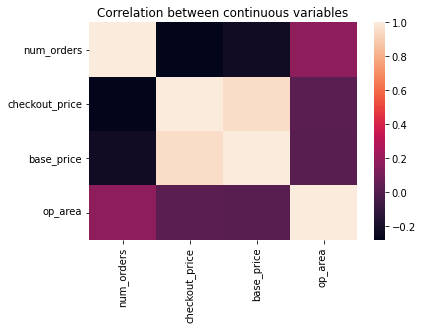

In [61]:
sns.heatmap(correlation)
plt.title("Correlation between continuous variables")
plt.show()


The checkout price and base price has high positive correlation with each other and negative correlation with number of orders. It make sense, customer will order cheaper meals more than costly meals.The operating area and discount has low positive correlation with other variables.



# Insights #1 - Seasonality in Food Demand

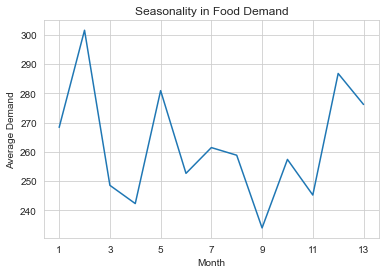

In [124]:
# Calculate average demand by month
monthly_demand = dataset.groupby('month')['num_orders'].mean()

# Plot monthly demand
monthly_demand.plot()
plt.xlabel('Month')
plt.ylabel('Average Demand')
plt.title('Seasonality in Food Demand')
plt.show()

Observation:  

Month 2 has highest order.

Month 9 has lowest order.

### Analysing order trend in year

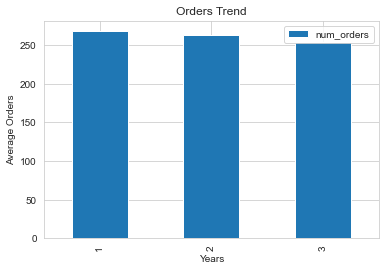

In [125]:
year_trend = dataset[['year', 'num_orders']].groupby('year').mean()

year_trend.reset_index().plot('year', 'num_orders', kind='bar')
plt.title("Orders Trend")
plt.xlabel("Years")
plt.ylabel("Average Orders")
plt.show()

We are not able to conclude anything as there are only availability of 3 years data and year 3 is incomplete.

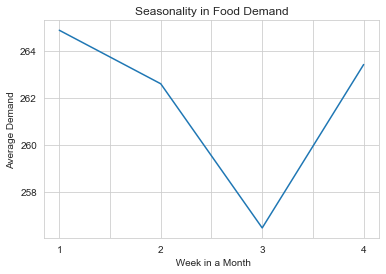

In [126]:
# Calculate average demand by month
monthly_demand = dataset.groupby('week_in_month')['num_orders'].mean()

# Plot monthly demand
monthly_demand.plot()
plt.xlabel(' Week in a Month')
plt.ylabel('Average Demand')
plt.title('Seasonality in Food Demand')
plt.show()

Observation:  

Start and end months have more orders than second and third week.

# Insights #2 - Promotion Impact

### Does promotion by email results in increase in number of orders ?
Let's perform hypothesis test to answer this question.

Null Hypothesis: The difference between the mean of number of orders with email promotion and without email promotion is less than or equal to zero.

Alternate Hypothesis: The difference between the mean of number of orders with email promotion and without email promotion is greater than zero.

In [62]:
# Function to draw samples, it will be used in performing tests
def draw_samples(series, statistic=np.mean, replicas=10000):
    size = series.shape[0]
    sample_data = [statistic(series.sample(n=size, replace=True)) for _ in range(replicas)]
    return np.array(sample_data)

In [63]:
promotion = dataset['emailer_for_promotion'].astype('int') + dataset['homepage_featured'].astype('int')
promotion.value_counts()

0    388874
1     48443
2     19231
dtype: int64

Observed mean difference: 401.83466060394824
Confidence Intervals: [394.4587872]
P-value: 0.0


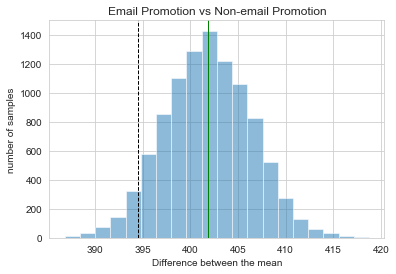

In [99]:
emailer_orders = dataset[dataset.emailer_for_promotion == 1]['num_orders']
non_emailer_orders = dataset[dataset.emailer_for_promotion == 0]['num_orders']

observed_mean_diff = emailer_orders.mean() - non_emailer_orders.mean()
mean_diff_bootstrap = draw_samples(emailer_orders) - draw_samples(non_emailer_orders)

confidence_interval = np.percentile(mean_diff_bootstrap, [5.0])
p_value = np.sum(mean_diff_bootstrap <= 0)/ len(mean_diff_bootstrap)

print("Observed mean difference: {}".format(observed_mean_diff))
print("Confidence Intervals: {}".format(confidence_interval))
print("P-value: {}".format(p_value))

# Plotting histogram
_ = plt.hist(mean_diff_bootstrap, bins=20, alpha=0.5)
_ = plt.xlabel("Difference between the mean")
_ = plt.ylabel("number of samples")
_ = plt.title("Email Promotion vs Non-email Promotion")

# Marking the 5% confidence interval
_ = plt.axvline(confidence_interval[0], color='k', linestyle='dashed', linewidth=1)
_ = plt.axvline(observed_mean_diff, color='g', linewidth=1)

plt.show()

The P-value of above hypothesis test is statistically significant for given left-side 0.05 alpha. Hence, we reject the null hypothesis and accept the alternative hypothesis.

The above Histogram also supports alternate hypothesis.

### Conclusion: Promotion Activity by emails does increase the number of orders

### Does promotion by email results in increase in number of orders ?
Let's perform hypothesis test to answer this question.

Null Hypothesis: The difference between the mean of number of orders with email promotion and without email promotion is less than or equal to zero.

Alternate Hypothesis: The difference between the mean of number of orders with email promotion and without email promotion is greater than zero.

Observed mean difference: 401.83466060394824
Confidence Intervals: [394.38553863]
P-value: 0.0


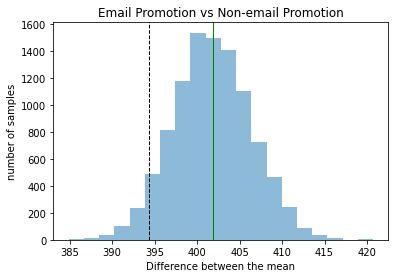

In [ ]:
emailer_orders = dataset[dataset.emailer_for_promotion == 1]['num_orders']
non_emailer_orders = dataset[dataset.emailer_for_promotion == 0]['num_orders']

observed_mean_diff = emailer_orders.mean() - non_emailer_orders.mean()
mean_diff_bootstrap = draw_samples(emailer_orders) - draw_samples(non_emailer_orders)

confidence_interval = np.percentile(mean_diff_bootstrap, [5.0])
p_value = np.sum(mean_diff_bootstrap <= 0)/ len(mean_diff_bootstrap)

print("Observed mean difference: {}".format(observed_mean_diff))
print("Confidence Intervals: {}".format(confidence_interval))
print("P-value: {}".format(p_value))

# Plotting histogram
_ = plt.hist(mean_diff_bootstrap, bins=20, alpha=0.5)
_ = plt.xlabel("Difference between the mean")
_ = plt.ylabel("number of samples")
_ = plt.title("Email Promotion vs Non-email Promotion")

# Marking the 5% confidence interval
_ = plt.axvline(confidence_interval[0], color='k', linestyle='dashed', linewidth=1)
_ = plt.axvline(observed_mean_diff, color='g', linewidth=1)

# plt.savefig('C:/Users/matebook x/Desktop/MTN/Food Demand Forecasting/diff_orders_email_promotion.jpg')
plt.show()

The P-value of above hypothesis test is statistically significant for given left-side 0.05 alpha. Hence, we reject the null hypothesis and accept the alternative hypothesis.

The above Histogram also supports alternate hypothesis.

### Conclusion: Promotion Activity by emails does increase the number of orders



### Does promotion in homepage results in increase in number of orders ?
Let's perform hypothesis test to answer this question.

Null Hypothesis: The difference between the mean of number of orders with homepage promotion and without homepage promotion is less than or equal to zero.

Alternate Hypothesis: The difference between the mean of number of orders with homepage promotion and without homepage promotion is greater than zero.

Observed mean difference: 373.8347456767344
Confidence Intervals: [368.01913055]
P-value: 0.0


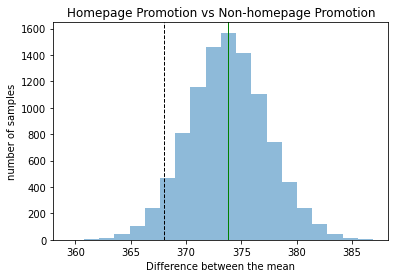

In [ ]:
homepage_orders = dataset[dataset.homepage_featured == 1]['num_orders']
non_homepage_orders = dataset[dataset.homepage_featured == 0]['num_orders']

observed_mean_diff = homepage_orders.mean() - non_homepage_orders.mean()
mean_diff_bootstrap = draw_samples(homepage_orders) - draw_samples(non_homepage_orders)

confidence_interval = np.percentile(mean_diff_bootstrap, [5.0])
p_value = np.sum(mean_diff_bootstrap <= 0)/ len(mean_diff_bootstrap)

print("Observed mean difference: {}".format(observed_mean_diff))
print("Confidence Intervals: {}".format(confidence_interval))
print("P-value: {}".format(p_value))

# Plotting histogram
_ = plt.hist(mean_diff_bootstrap, bins=20, alpha=0.5)
_ = plt.xlabel("Difference between the mean")
_ = plt.ylabel("number of samples")
_ = plt.title("Homepage Promotion vs Non-homepage Promotion")

# Marking the 5% confidence interval
_ = plt.axvline(confidence_interval[0], color='k', linestyle='dashed', linewidth=1)
_ = plt.axvline(observed_mean_diff, color='g', linewidth=1)

# plt.savefig('C:/Users/matebook x/Desktop/MTN/Food Demand Forecasting/diff_orders_homepage_promotion.jpg')
plt.show()

The P-value of above hypothesis test is statistically significant for given left-side 0.05 alpha. Hence, we reject the null hypothesis and accept the alternative hypothesis.

The above Histogram also supports alternate hypothesis.

### Conclusion: Promotion Activity in homepage does increase the number of orders



### Which promotional activity has higher impact on number of orders?

Let's perform hypothesis test, on dataset were either promotion activity is perfromed, to answer this question.

Null Hypothesis: The difference between the mean of number of orders with homepage promotion and without homepage promotion is less than or equal to zero.

Alternate Hypothesis: The difference between the mean of number of orders with homepage promotion and without homepage promotion is greater than zero.

Observed mean difference: 24.59858319570185
Confidence Intervals: [14.58971433]
P-value: 0.0


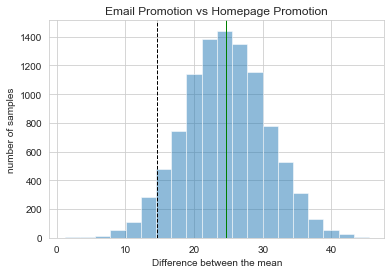

In [119]:
either_activity = dataset[promotion == 1]

homepage_orders = either_activity[either_activity.homepage_featured == 1]['num_orders']
non_homepage_orders = either_activity[either_activity.homepage_featured == 0]['num_orders']

observed_mean_diff = homepage_orders.mean() - non_homepage_orders.mean()
mean_diff_bootstrap = draw_samples(homepage_orders) - draw_samples(non_homepage_orders)

confidence_interval = np.percentile(mean_diff_bootstrap, [5.0])
p_value = np.sum(mean_diff_bootstrap <= 0)/ len(mean_diff_bootstrap)

print("Observed mean difference: {}".format(observed_mean_diff))
print("Confidence Intervals: {}".format(confidence_interval))
print("P-value: {}".format(p_value))

# Plotting histogram
plt.hist(mean_diff_bootstrap, bins=20, alpha=0.5)
plt.xlabel("Difference between the mean")
plt.ylabel("number of samples")
plt.title("Email Promotion vs Homepage Promotion")

# Marking the 5% confidence interval
plt.axvline(confidence_interval[0], color='k', linestyle='dashed', linewidth=1)
plt.axvline(observed_mean_diff, color='g', linewidth=1)

#plt.savefig('figure/impact_homepage_vs_email.jpg')
plt.show()

The P-value of above hypothesis test is statistically significant for given left-side 0.05 alpha. Hence, we reject the null hypothesis and accept the alternative hypothesis.

The above Histogram also supports alternate hypothesis.

### Conclusion: Promotion Activity in homepage has more impact than emails on increase in number of orders

In [123]:
# Analyze promotion impact on demand
promo_effect = homepage_orders.mean()
print('Average promotion impact on demand:', promo_effect.mean())

Average promotion impact on demand: 455.87620820271684


Insights # 2: 

1. The checkout price and base price has high positive correlation with each other.

2. They also have negative correlation with number of orders.

3. The operating area  has low positive correlation with other variables.

4. Promotion Activity by emails does increase the number of orders.

5. Promotion Activity in homepage does increase the number of orders.

6. Promotion activity in homepage has more impact than emails on increase in number of orders.

# Insights #3 - How does the order demand vary with respect to different centers?

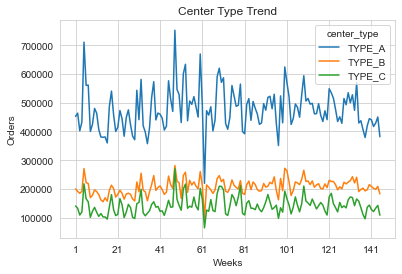

In [132]:
center_type_trend = dataset.pivot_table(index='week', columns='center_type', values='num_orders', 
                                        aggfunc='sum')

center_type_trend.plot()
plt.title("Center Type Trend")
plt.xlabel("Weeks")
plt.ylabel("Orders")
plt.show()

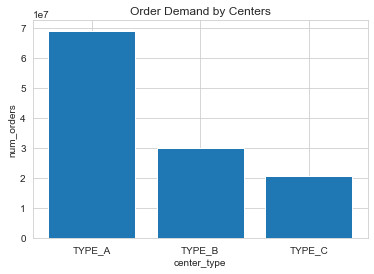

In [133]:
center_demand = dataset.groupby('center_type')['num_orders'].sum().reset_index().sort_values('num_orders', ascending=False)[:10]
plt.bar(center_demand['center_type'], center_demand['num_orders'])
plt.title('Order Demand by Centers')
plt.xlabel('center_type')
plt.ylabel('num_orders')
plt.show()

Insights #3:

Type A center has more orders than Type B and Type C.

# Analyzing the trend in orders

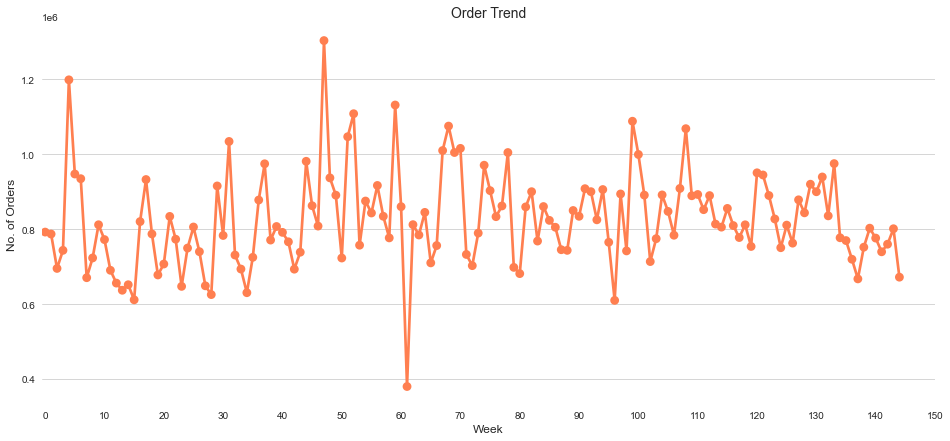

In [98]:
fig = plt.figure(figsize=(16,7))
sns.set_style("whitegrid")
plt.title('Order Trend',fontdict={'fontsize':14})

sns.pointplot(x=dataset.groupby('week').sum().reset_index()['week'],y=dataset.groupby('week').sum().reset_index()['num_orders'],color='coral')
plt.xticks(range(0, 160, 10), list(np.arange(0,160,10)))
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Week',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

Observation :

The maximum orders were in week 5 and week 48.Minimum orders were in week 62.

Inorder to have a better idea we will check week 48 and week 62 more.


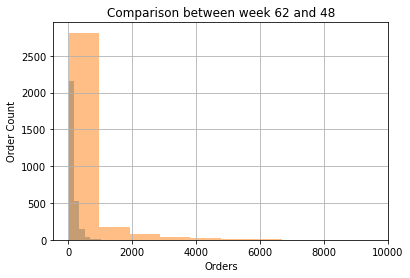

In [66]:
dataset_week_62 = dataset[dataset.week == 62]
dataset_week_48 = dataset[dataset.week == 48]

dataset_week_62.num_orders.hist(alpha=0.5)
dataset_week_48.num_orders.hist(alpha=0.5)
plt.xlabel('Orders')
plt.ylabel('Order Count')
plt.title('Comparison between week 62 and 48')
plt.show()

Observation: 

There is a very huge difference in distribution.

In [67]:
dataset_week_62.emailer_for_promotion.value_counts()


0    2715
1     175
Name: emailer_for_promotion, dtype: int64

In [68]:
dataset_week_48.emailer_for_promotion.value_counts()

0    2729
1     401
Name: emailer_for_promotion, dtype: int64

In [69]:

dataset[dataset.week == 5].emailer_for_promotion.value_counts()

0    2522
1     337
Name: emailer_for_promotion, dtype: int64

Observation:

There were almost double promotional activity, by email, in week 48 and week 5 as compare to week 62. Hence, there is hugh difference in number of orders.

# Insights #4 : Which cuisine is most popular among customers?

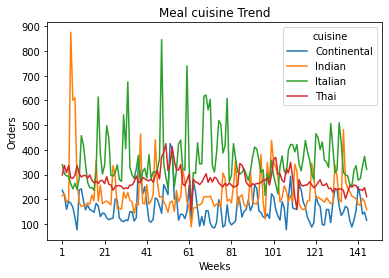

In [76]:
cuisine_trend = dataset.pivot_table(index='week', columns='cuisine', values='num_orders', aggfunc='mean')

cuisine_trend.plot()
_ = plt.title("Meal cuisine Trend")
_ = plt.xlabel("Weeks")
_ = plt.ylabel("Orders")
plt.show()

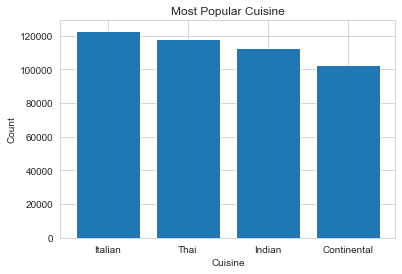

In [138]:
cuisine_count = dataset['cuisine'].value_counts()
plt.bar(cuisine_count.index, cuisine_count.values)
plt.title('Most Popular Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.show()

In [94]:
cui = dataset.groupby('cuisine').size().sort_values(ascending=False)
print(cui)

cuisine
Italian        122925
Thai           118216
Indian         112612
Continental    102795
dtype: int64


Insights#4 :

1. Most Popular cuisine is Italian.

2. There is fluctuation of order for Indian cuisine.

3. Less Popular cuisine is continental.



# Insights #5:  What is the average order demand for each cuisine?

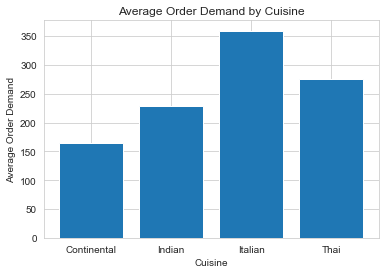

In [144]:
cuisine_mean = dataset.groupby('cuisine')['num_orders'].mean().reset_index()
plt.bar(cuisine_mean['cuisine'], cuisine_mean['num_orders'])
plt.title('Average Order Demand by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Average Order Demand')
plt.show()

In [152]:
cuisine_mean.sort_values(by=['num_orders'], ascending=False)

,cuisine,num_orders
2,Italian,359.347830
3,Thai,276.423411
1,Indian,229.039037
0,Continental,164.545348


checking meal category trend

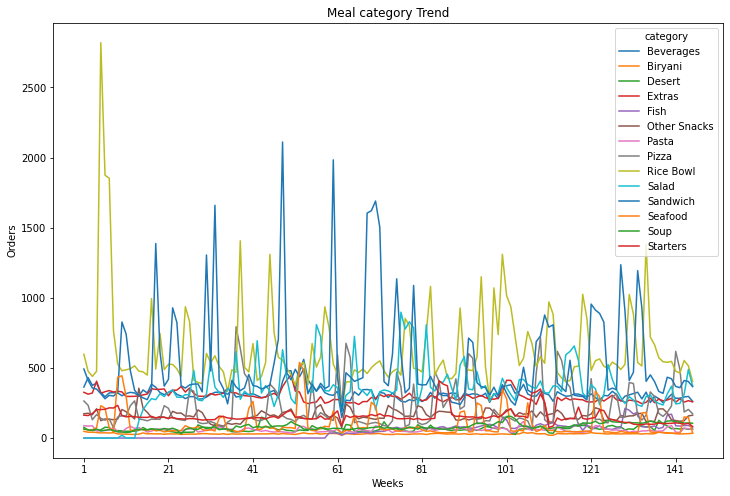

In [77]:
category_trend = dataset.pivot_table(index='week', columns='category', values='num_orders', aggfunc='mean')
category_trend = category_trend.fillna(0)

category_trend.plot(figsize=(12, 8))
plt.title("Meal category Trend")
plt.xlabel("Weeks")
plt.ylabel("Orders")
plt.show()

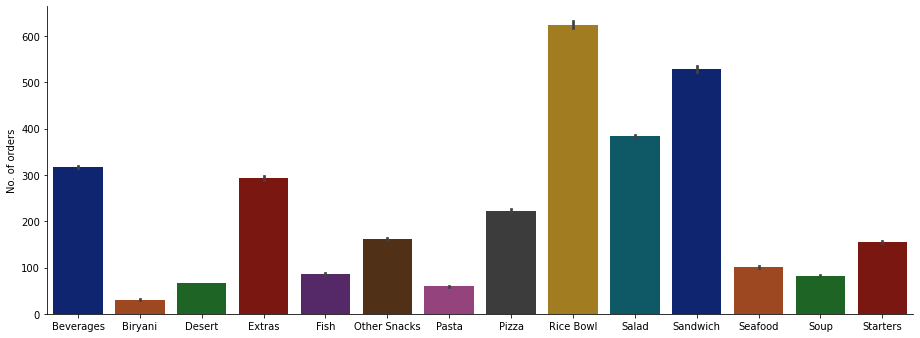

In [95]:
g = sns.catplot(
    data=dataset, kind="bar",
    x="category", y="num_orders",
     palette="dark"
)
g.fig.set_figwidth(15)
g.fig.set_figheight(5)
g.set_axis_labels("", "No. of orders")

Observations:

1. Most popular category is Ricebowl followed by sandwich.

2. Less popular category is Biriyani.

3. After week 18, Salad became popular with customers.





Analyzing regional trend

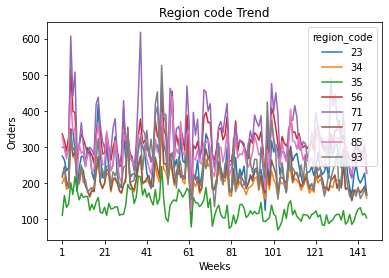

In [84]:
region_code_trend = dataset.pivot_table(index='week', columns='region_code', values='num_orders', 
                                        aggfunc='mean')

region_code_trend.plot()
plt.title("Region code Trend")
plt.xlabel("Weeks")
plt.ylabel("Orders")

plt.show()

Observation:  

1. Region 35 has lowest number of orders.

2. Fluctuations are there in all regions.

Analyzing operating area trend

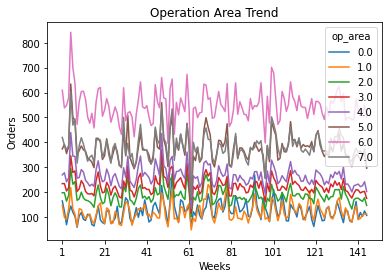

In [85]:
op_area_trend = dataset.copy()
op_area_trend['op_area'] = np.floor(op_area_trend['op_area'])
op_area_trend = op_area_trend.pivot_table(index='week', columns='op_area', values='num_orders', 
                                          aggfunc='mean')

op_area_trend.plot()
plt.title("Operation Area Trend")
plt.xlabel("Weeks")
plt.ylabel("Orders")
plt.show()

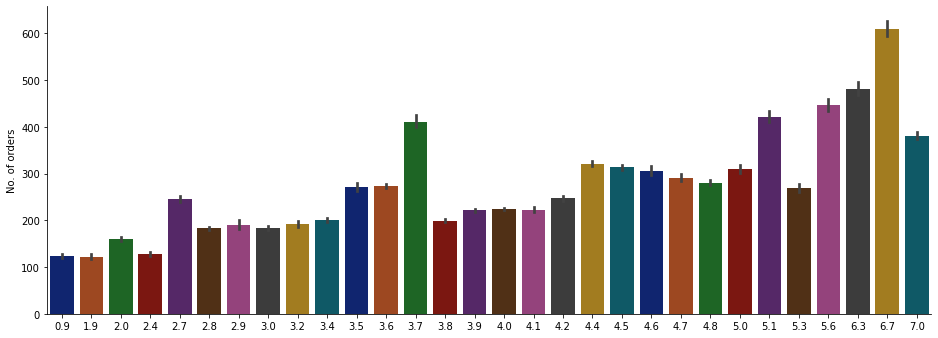

In [86]:
g = sns.catplot(
    data=dataset, kind="bar",
    x="op_area", y="num_orders",
     palette="dark"
)
g.fig.set_figwidth(15)
g.fig.set_figheight(5)
g.set_axis_labels("", "No. of orders")

dataset.op_area

Observations: 

1. Op_area 6.7 has highest number of orders.

# *Actionable Insights obtained are as follows* .

## Insight #1:

Seasonality in Food Demand.

The dataset shows clear seasonality in food demand, with higher demand in 2nd and 12th months and lower demand in 9th month. Also food demand is high in first and fourth month compared to that of second and third week.This insight can be used by restaurants and food delivery services to plan their menus and inventory accordingly.



## Insight #2 :

Promotion Impact.

The second insight analyzes the impact of promotions on demand and calculates the average promotion impact, which can be used to design effective promotion strategies to increase customer loyalty and attract new customers.The promotional activities including homepage and emails inproves the order number.Promotion activity in homepage has more impact than emails on increase in number of orders.

## Insights #3:

Order Demand by Centers.

Analyzing the demand for orders by centers helps to identify the centers that may be experiencing higher demand and may require additional resources.Type A center has more orders than Type B and Type C.


## Insight # 4:

Most Popular Cuisine.

By analyzing the most popular cuisine among customers helps to optimize the menu and focus on popular items.

  1. Most Popular cuisine is Italian.

  2. There is fluctuation of order for Indian cuisine.

  3. Less Popular cuisine is continental.

## Insight #5 :

Average Order Demand by Cuisine: 

Analyzing the average order demand for each cuisine helps to determine which cuisines are more profitable and which items may need to be reevaluated.

  1. The average order demand for Italian cuisine is 359.35.

  2. The average order demand for Thai cuisine is 276.42.

  3. The average order demand for Indian cuisine is 229.03.

  4. The average order demand for Continental cuisine is 164.55.



